## PCA_Clustering Assignment

 Cluster the countries by the socio economic factors mentioned in the country data set.

### Importing Libraries and data set

In [183]:
# Importing Pandas,NumPy and visulaization lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing PCA 
from sklearn.decomposition import PCA

# KMeans Clustering lib
from sklearn.cluster import KMeans

# Hierarchical Clustering lib
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram

In [184]:
# Importing dataset
country_data = pd.read_csv("Country-data.csv")

### Let's understand the structure of our dataframe and Clean it. 


In [185]:
# Check for NA values in dataset
print(country_data.isnull().values.any())
print(country_data.isnull().values.sum())
print(country_data.isnull().all(axis=1).sum())

False
0
0


In [186]:
# Let's see the head of our master dataset
country_data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [187]:
country_data.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [188]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


### Correlation Matrix

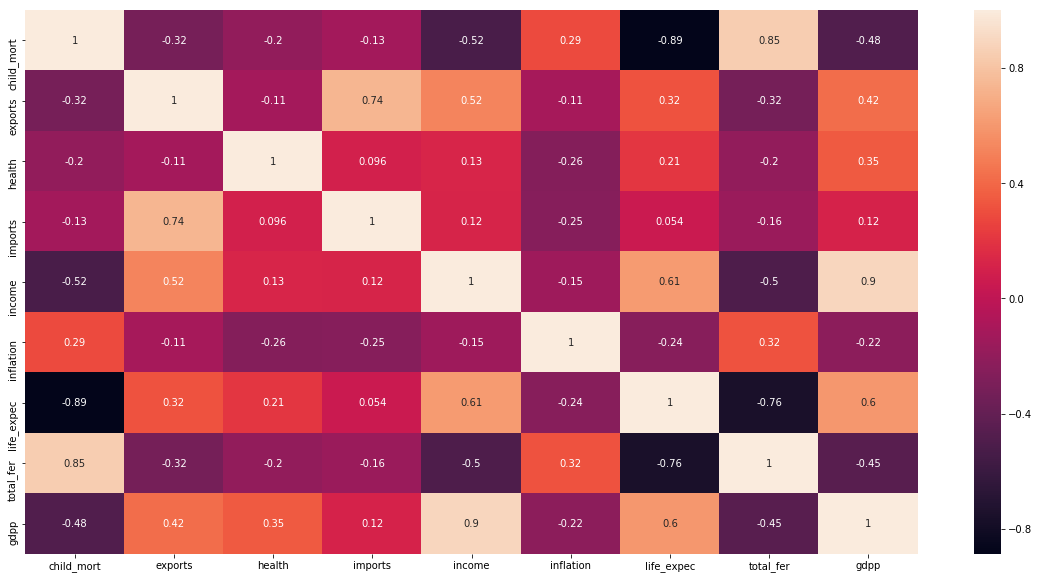

In [189]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(country_data.corr(),annot = True)

## PCA on the data

### Data scaling

PCA requires scaling/normalization of the data to work properly

In [190]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [191]:
df_data=country_data.copy()
country_data = country_data.drop('country',axis=1)

In [192]:
X = scaler.fit_transform(country_data)

In [193]:
dfx = pd.DataFrame(data=X,columns=country_data.columns)

In [194]:
dfx.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

In [195]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [196]:
#Doing the PCA on the data
dfx_pca = pca.fit(dfx)

Lets Plot the explained variance ratio

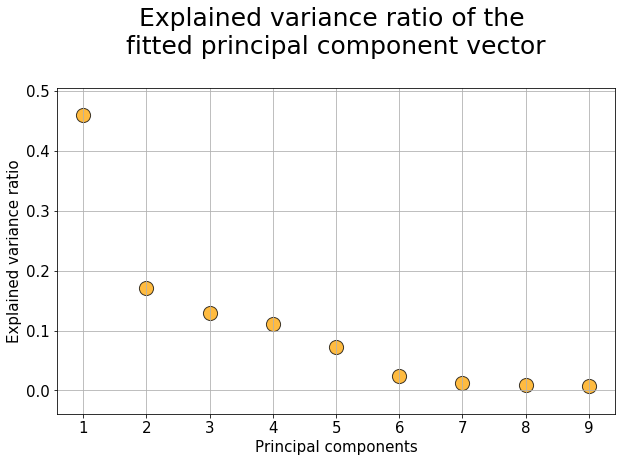

In [197]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

The above plot means that the $1^{st}$ principal component explains about 45% of the total variance in the data and the $2^{nd}$ component explians further 18%. Therefore, if we just consider first two components, they together explain 63% of the total variance

### Showing better separation using principal components

Transform the scaled data set using the fitted PCA object

In [198]:
dfx_trans = pca.transform(dfx)

In [199]:
#Put it in a data frame
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

0         1         2         3         4         5         6  \
0 -2.913025  0.095621 -0.718118  1.005255 -0.158310 -0.254597  0.383000   
1  0.429911 -0.588156 -0.333486 -1.161059  0.174677  0.084579  0.248919   
2 -0.285225 -0.455174  1.221505 -0.868115  0.156475 -0.401696 -0.087214   
3 -2.932423  1.695555  1.525044  0.839625 -0.273209 -0.547996 -0.440835   
4  1.033576  0.136659 -0.225721 -0.847063 -0.193007 -0.206919  0.241978   
5  0.022407 -1.779187  0.869997 -0.036967  0.981057 -0.003596 -0.150832   
6 -0.101584 -0.568252  0.242092 -1.466266 -0.055992  0.282469  0.546907   
7  2.342165 -1.988459  0.190344  1.105038 -0.731192 -0.156455  0.382386   
8  2.973764 -0.734689 -0.519766  1.205442  0.083580  0.099255 -0.051831   
9 -0.181487 -0.402866  0.867459 -0.438773  0.137350  0.637836 -0.963776   

          7         8  
0  0.415076 -0.014148  
1 -0.221042  0.173316  
2 -0.184162  0.084037  
3 -0.355998 -0.091339  
4 -0.023681  0.094270  
5  0.125950  0.126079  
6 -0.168164 -0.065629  
7 -0.267776 -0.350631  
8 -0.156019 -0.104369  
9 -0.063190 -0.035275

#### Plot the first two columns of this transformed data set 

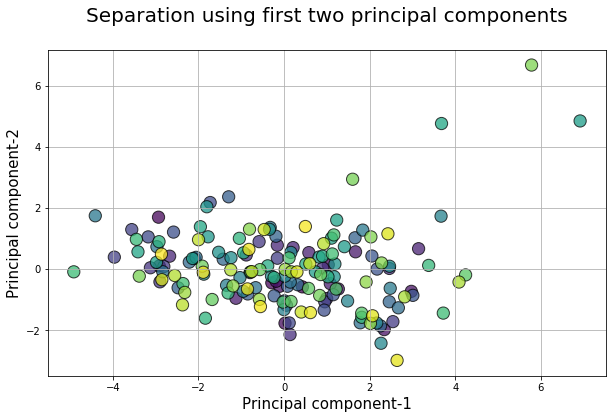

In [200]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df_data['country'].index,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

### Now we'll plot original features on the first 2 principal components as axes

In [202]:
colnames=list(df_data.columns[1:])
pcs_df = pd.DataFrame({'PC1':dfx_pca.components_[0],'PC2':dfx_pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1       PC2     Feature
0 -0.419519  0.192884  child_mort
1  0.283897  0.613163     exports
2  0.150838 -0.243087      health
3  0.161482  0.671821     imports
4  0.398441  0.022536      income

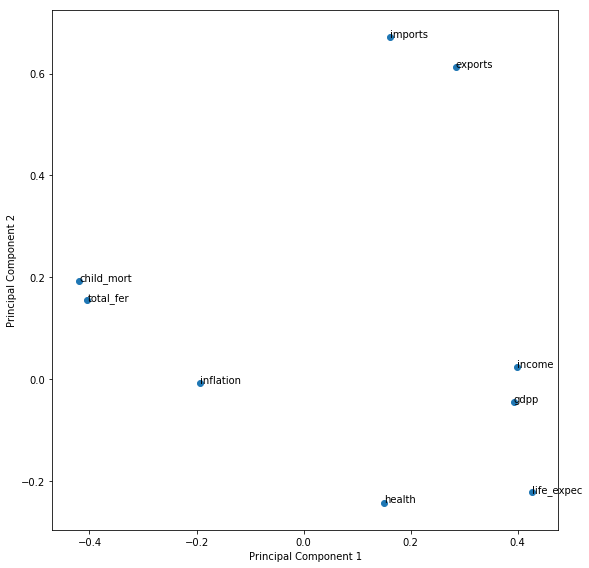

In [203]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

Now We can see that the first component is in the direction where the growth related variables(`income`,`gdpp`) are heavy. Where as second component is in the direction where the exchange related variables(`imports`,`exports`) are heavy.

#### Looking at the screeplot to assess the number of needed principal components

In [204]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

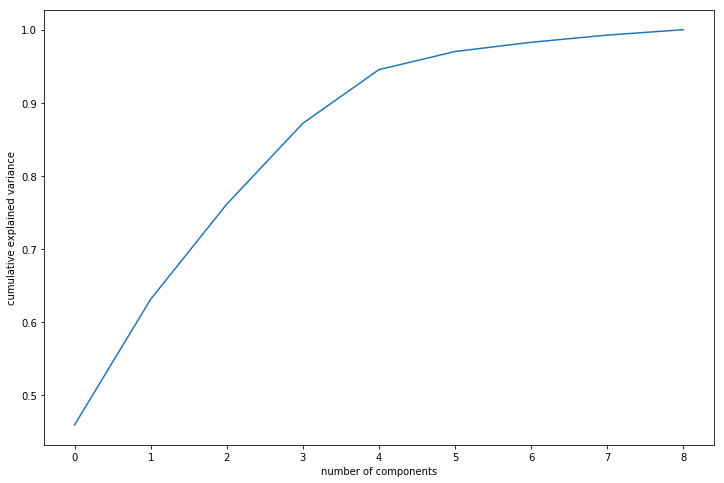

In [205]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### From the above figure it comes to a conclusion that 4 components are enough to describe 95% of the variance in the dataset

In [206]:
#Using incremental PCA  
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [207]:
# Basis transformation - getting the data onto our PCs
df_pca = pca_final.fit_transform(X)
df_pca.shape

(167, 4)

### Checking correlation

In [208]:
# Create correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

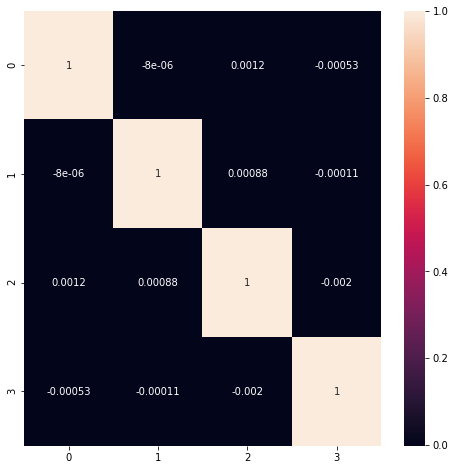

In [209]:
# Plotting the correlation matrix
plt.figure(figsize = (8,8))
sns.heatmap(corrmat,annot = True)

In [210]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0011961925092541393 , min corr:  -0.002037829535552866


Since from the above results there seems to no corelation between any two components

### Checking for Outliers

In [211]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
90%    100.220000   70.800000   10.940000   75.420000   41220.000000   
95%    116.000000   80.570000   11.570000   81.140000   48290.000000   
99%    153.400000  160.480000   13.474000  146.080000   84374.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

Since the values are incremental hence no outliers in data.


## Clustering with KMeans

#### We run k-means++ model (k-means with carefully initialized centroids) iterating over number of clusters (1 to 15) and plot the within-cluster-sum-of-squares (WCSS) matric to determine the optimum number of cluster by elbow method

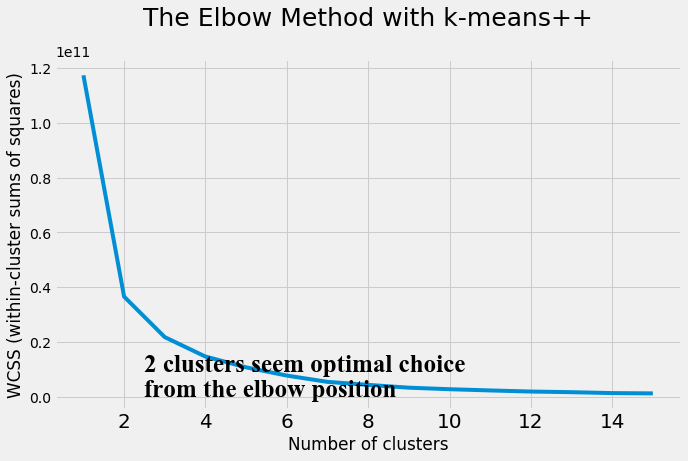

In [224]:
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(country_data)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 16), wcss)
    plt.title('The Elbow Method with k-means++\n',fontsize=25)
    plt.xlabel('Number of clusters')
    plt.xticks(fontsize=20)
    plt.ylabel('WCSS (within-cluster sums of squares)')
    plt.text(x=2.5,y=0.3,s='2 clusters seem optimal choice \nfrom the elbow position',
             fontsize=25,fontdict={'family':'Times New Roman'})
    plt.show()

### Now Performing Hierarchial Method Clustering

In [239]:
plt.figure(figsize=(16,6))
plt.title('Dendrogram')
plt.xlabel('Country')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(country_data, method = 'ward'))
plt.show()


### Optimal number of clusters
Often, the optimal number of clusters can be found from a Dendogram in a simple manner.

1. Look for the longest stretch of vertical line which is not crossed by any extended horizontal lines (here extended means horizontal lines i.e. the cluster dividers are extended infinitely to both directions).
2. Now take any point on that stretch of line and draw an imaginary horizontal line.
3. Count how many vertical lines this imaginary lines crossed.
That is likely to be the optimal number of clusters.

#### Here the optimal number of clusters could be 2.


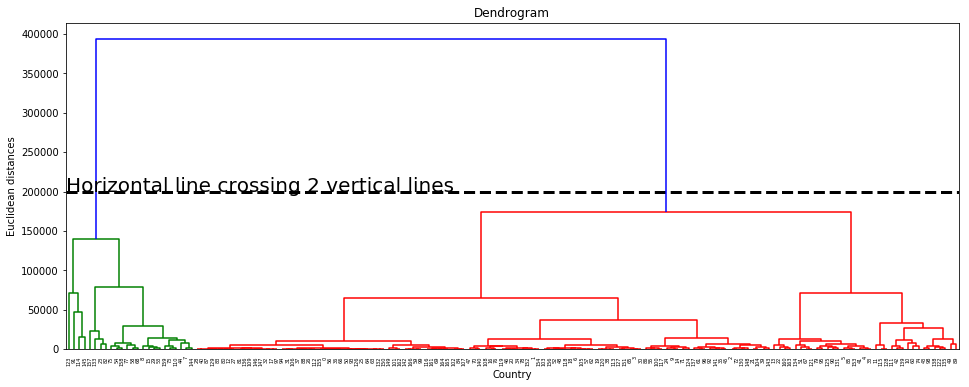

In [255]:
plt.figure(figsize=(16,6))
plt.title('Dendrogram')
plt.xlabel('Country')
plt.ylabel('Euclidean distances')
plt.hlines(y=200000,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.text(x=0,y=200000,s='Horizontal line crossing 2 vertical lines',fontsize=20)
#plt.grid(True)
mergings=sch.linkage(country_data, method = 'ward')
dendrogram = sch.dendrogram(mergings)
plt.show()

In [256]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 2).reshape(-1,))
country_data_hc = pd.concat([df_data, clusterCut], axis=1)
country_data_hc.columns = ['country','child_mort','exports','health','imports',
                           'income','inflation','life_expec','total_fer','gdpp', 'ClusterID']

In [257]:
#summarise
hc_clusters_child_mort = 	pd.DataFrame(country_data_hc.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(country_data_hc.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(country_data_hc.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(country_data_hc.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(country_data_hc.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(country_data_hc.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(country_data_hc.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(country_data_hc.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(country_data_hc.groupby(["ClusterID"]).gdpp.mean())

In [258]:
df_hc = pd.concat([pd.Series([0,1]), hc_clusters_child_mort, hc_clusters_exports, hc_clusters_health, hc_clusters_imports, 
                hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec, hc_clusters_total_fer, hc_clusters_gdpp], axis=1)
df_hc.columns = ["ClusterID", "child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean",
              "life_expec_mean","total_fer_mean","gdpp_mean"]
df_hc.head()

ClusterID  child_mort_mean  exports_mean  health_mean  imports_mean  \
0          0        43.847552     37.916776      6.44972     46.468293   
1          1         5.037500     60.129167      8.99625     49.404167   

    income_mean  inflation_mean  life_expec_mean  total_fer_mean     gdpp_mean  
0  11085.055944        8.565629        68.890909        3.142168   6532.265734  
1  53250.000000        3.111708        80.475000        1.790833  51287.500000